# Pregunta 2

Crea un repositorio publico en `github.com` de nombre `cap199_preg2_mod2`.
En este repositorio se deben realizar 4 push, uno para cada una de las soluciones (implementadas en python) de los siguientes items:

## **a.**

Visualiza la función $seno$ junto con varias rectas tangentes en diferentes puntos (`0, np.pi/4, np.pi/2, np.pi, 3*np.pi/2`). El resultado debe ser practicamente al que a continuacion muestro.

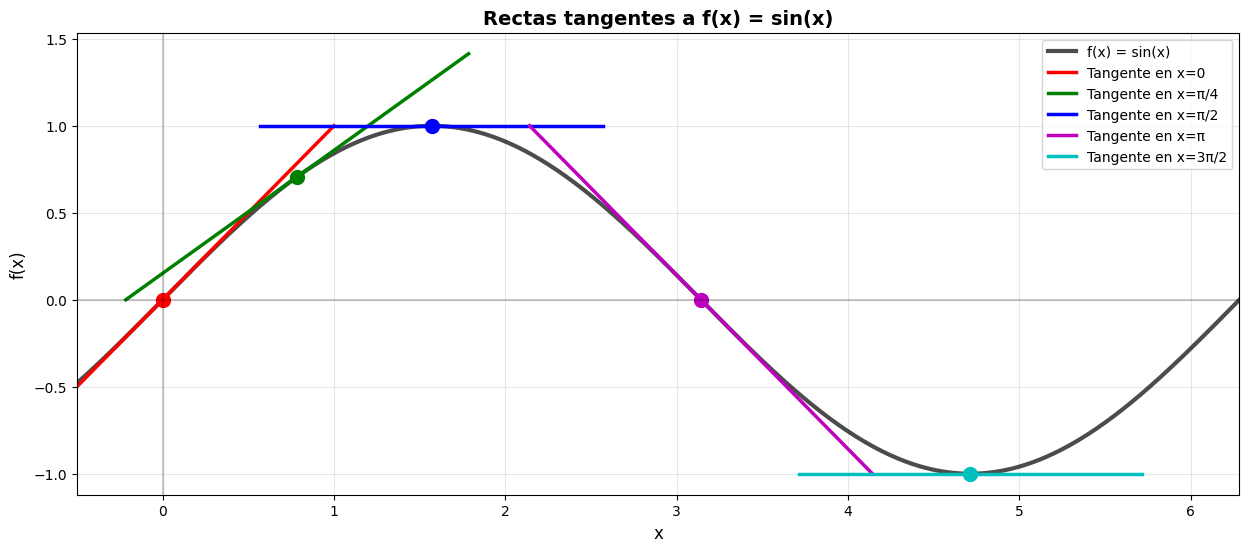

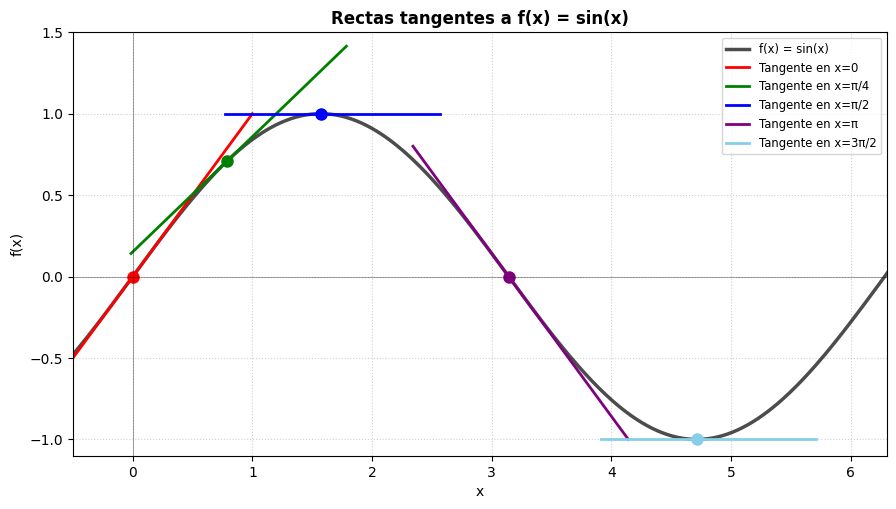

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función y derivada
def f(x):
    return np.sin(x)
def df(x):
    return np.cos(x)

# Puntos de tangencia y dominio
x = np.linspace(-0.5, 6.5, 500)
puntos_tangencia = [0, np.pi/4, np.pi/2, np.pi, 3*np.pi/2]
colores = ['red', 'green', 'blue', 'purple', 'skyblue']
etiquetas = ['x=0', 'x=π/4', 'x=π/2', 'x=π', 'x=3π/2']

# Creación de la figura
plt.figure(figsize=(10.5, 5.5))

# Grafico de la función seno principal
plt.plot(x, f(x), color='black', linewidth=2.5, alpha=0.7, label='f(x) = sin(x)')

# Cálculo y gráfico de cada recta tangente
for pt, col, etiq in zip(puntos_tangencia, colores, etiquetas):
    # Punto de tangencia (x0, y0)
    x0 = pt
    y0 = f(x0)
    m = df(x0) # Pendiente

    # Definición de intervalo local para la recta tangente
    x_tan = np.linspace(x0 - 0.8, x0 + 1, 100)
    y_tan = m * (x_tan - x0) + y0

    # Gráfico de la recta y el punto de tangencia
    plt.plot(x_tan, y_tan, color=col, linewidth=2, label=f'Tangente en {etiq}')
    plt.plot(x0, y0, marker='o', color=col, markersize=8)

# Visualización
plt.axhline(0, color='black', linewidth=0.5, alpha=0.5)
plt.axvline(0, color='black', linewidth=0.5, alpha=0.5)
plt.grid(True, linestyle=':', alpha=0.6)
plt.xlim(-0.5, 6.3)
plt.ylim(-1.1, 1.5)

plt.title('Rectas tangentes a f(x) = sin(x)', fontweight='bold')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(fontsize='small', loc='upper right')

plt.show()

## **b.**

Dataset : https://github.com/robintux/Datasets4StackOverFlowQuestions/blob/master/Cancer_Pulmon.zip

Cargar el dataset en memoria : Usar como nombre de variable : `df`



In [2]:
# Solucion
import pandas as pd
import requests
import zipfile
import io

# Descargar el archivo ZIP desde GitHub
url = "https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/Cancer_Pulmon.zip"
response = requests.get(url)

# Descomprimir el contenido en memoria
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    # Extraemos el nombre del archivo CSV que está dentro del zip
    csv_filename = z.namelist()[0]
    with z.open(csv_filename) as f:
        # Cargar el dataset en la variable df
        df = pd.read_csv(f)

# Verificar la carga
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


## **c.**

Con la variable `df` del item **b.** genere el siguiente grafico:

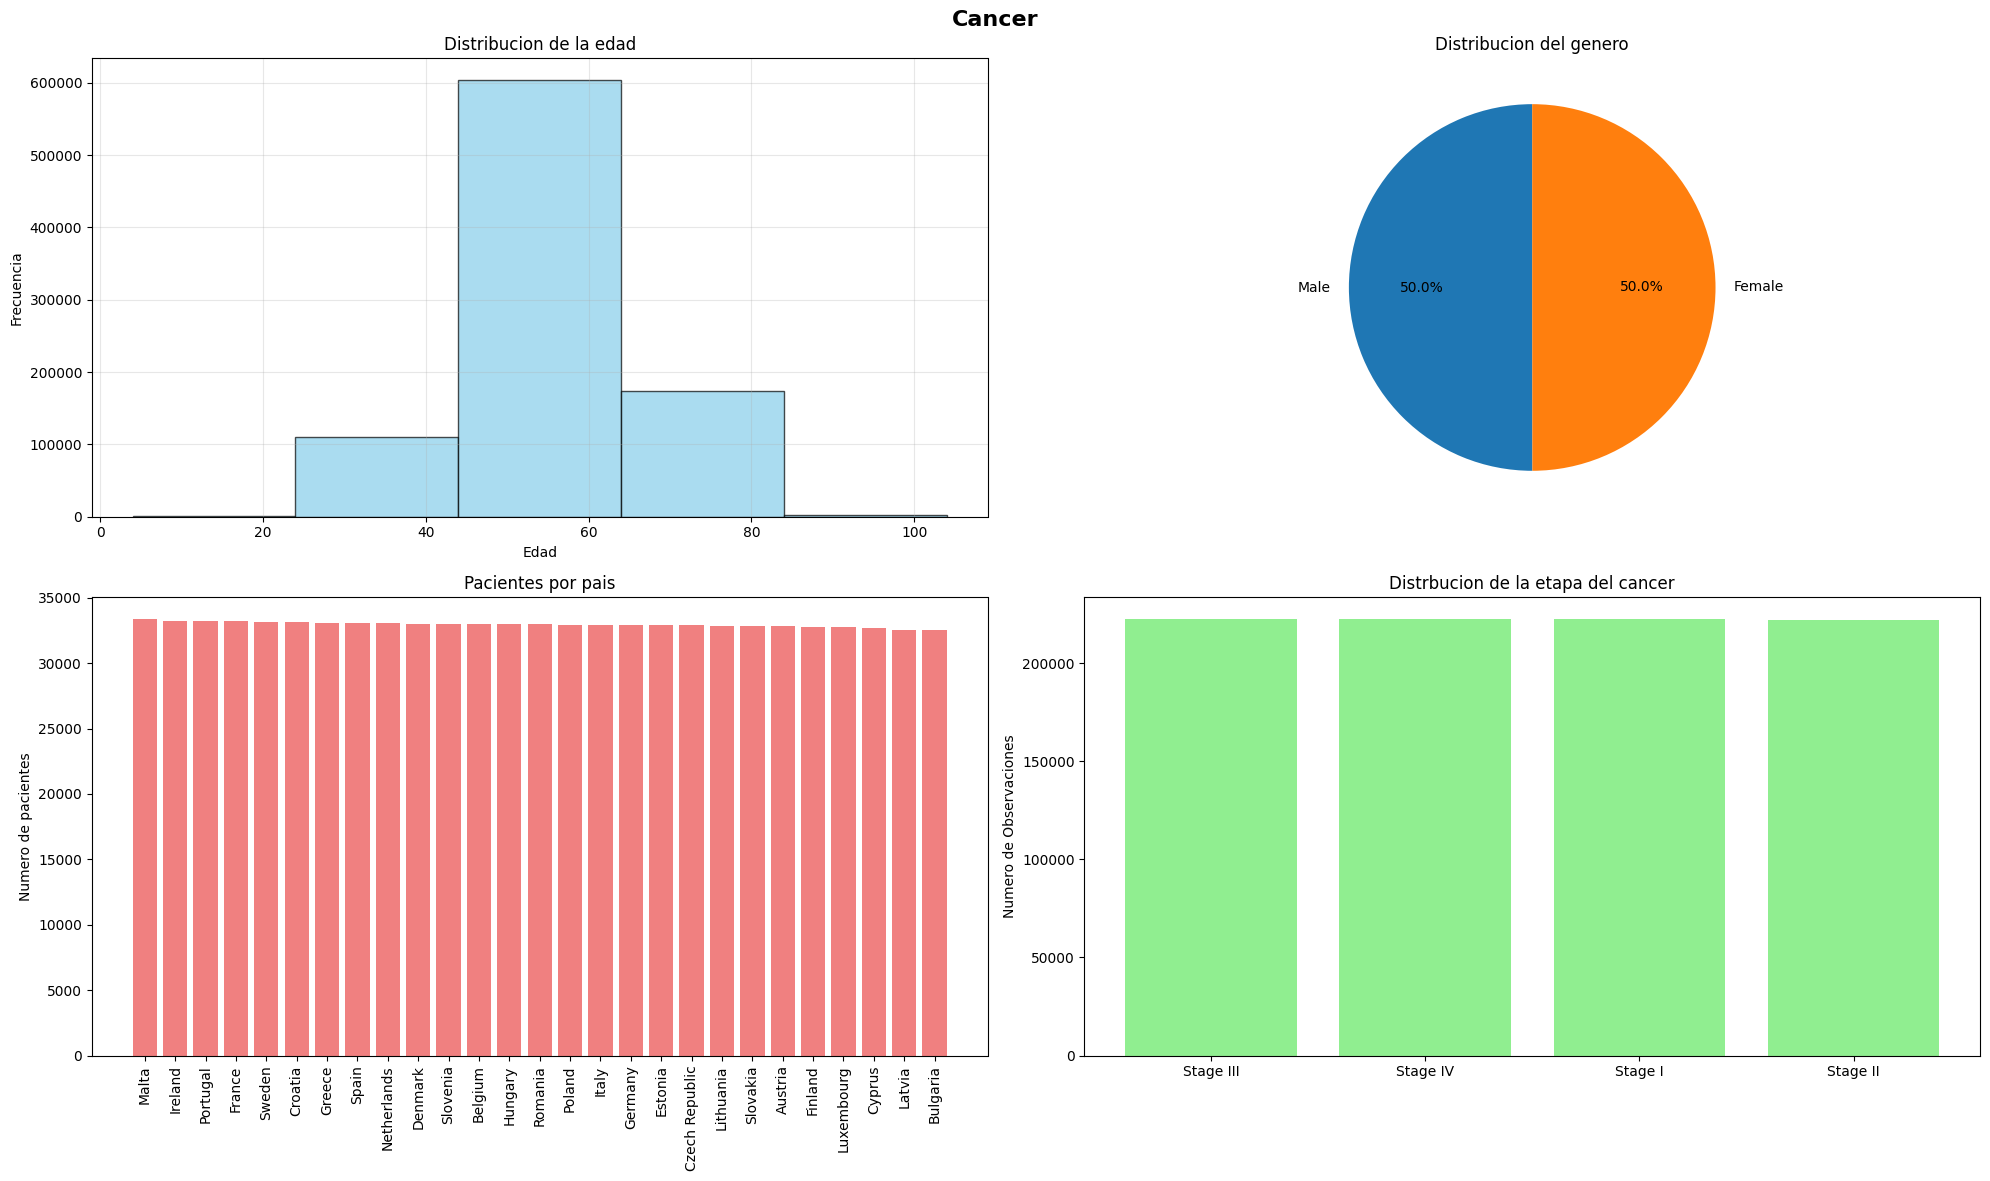

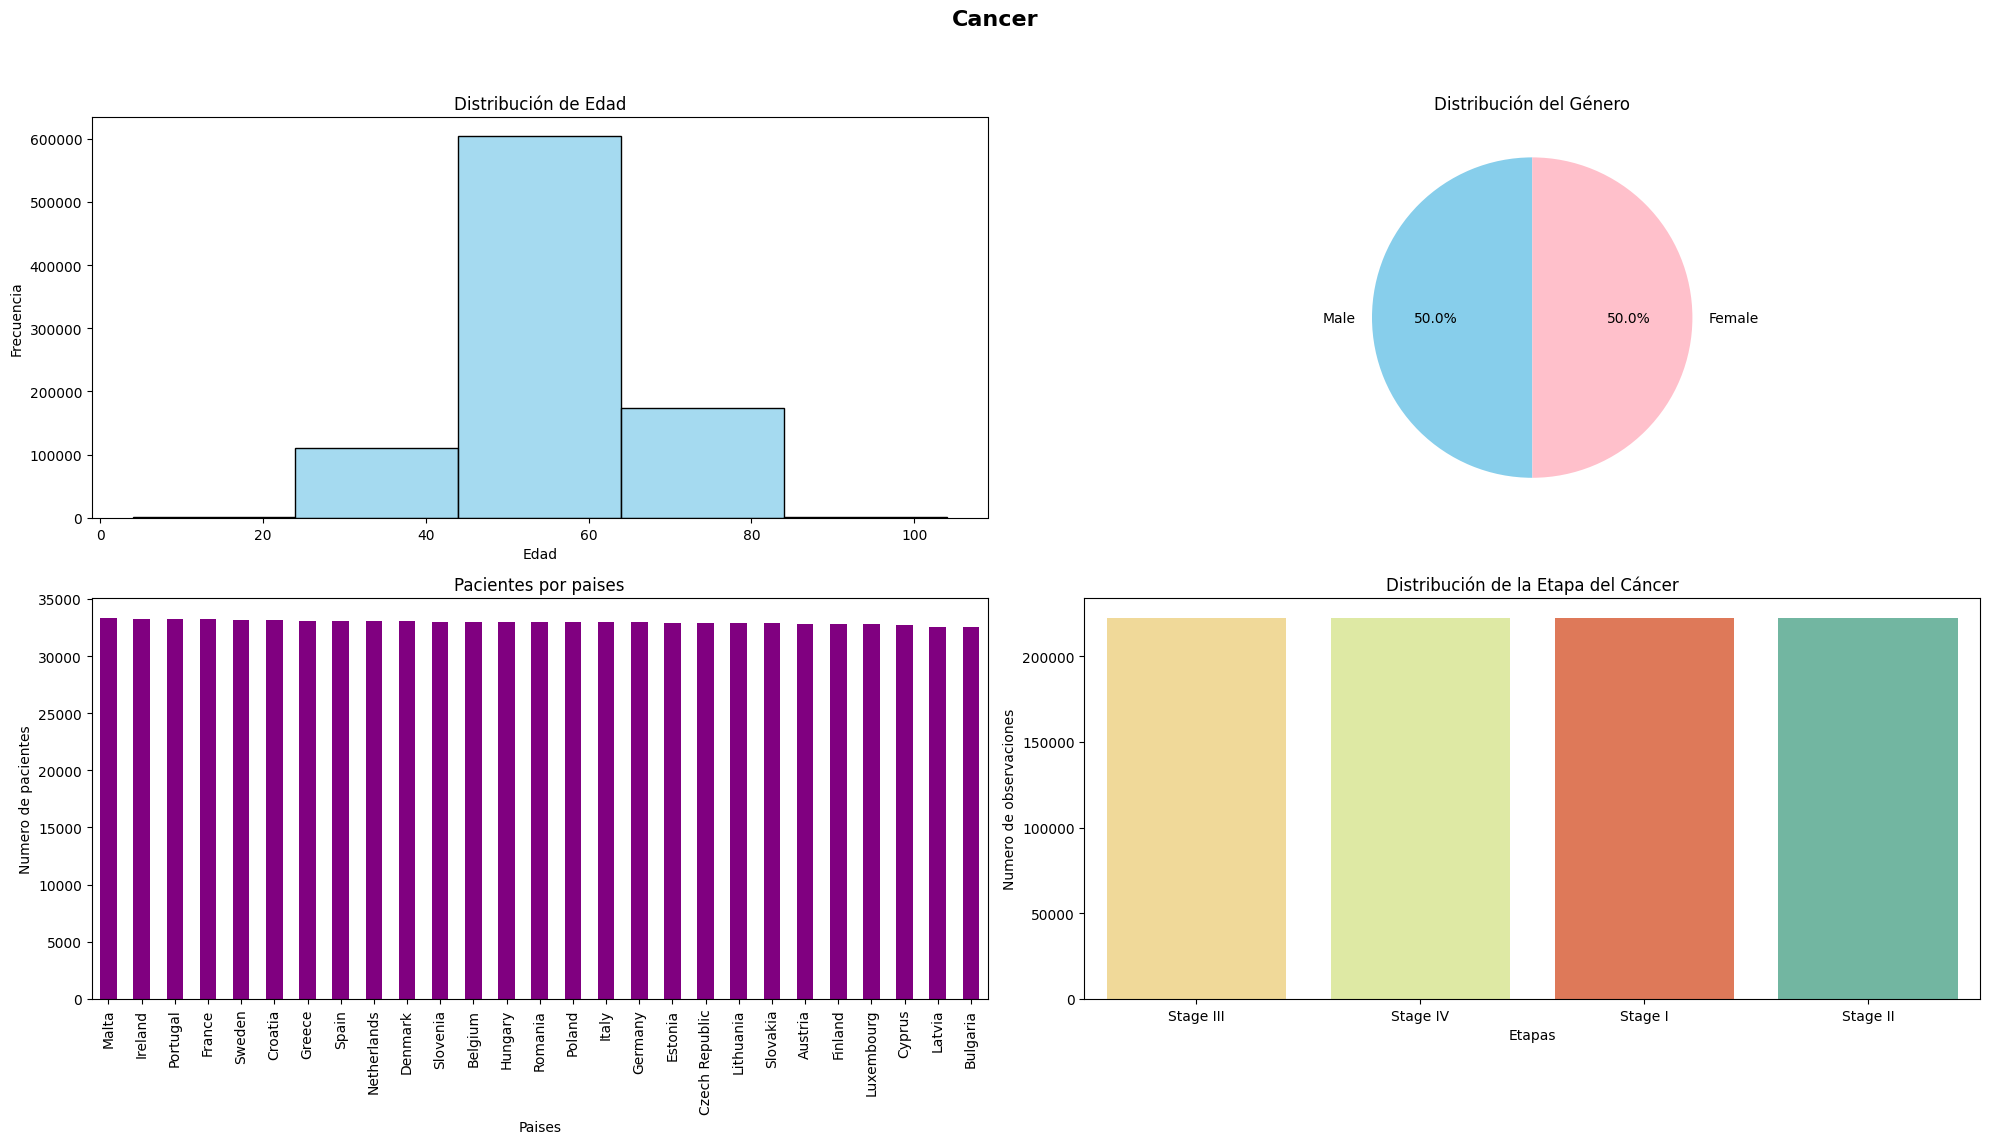

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Cancer', fontsize=16, fontweight='bold')

# Histograma de la columna/variable : age
sns.histplot(df['age'], bins=5, ax=axes[0, 0], kde=False, color='skyblue')
axes[0, 0].set_title('Distribución de Edad')
axes[0, 0].set_xlabel('Edad')
axes[0, 0].set_ylabel('Frecuencia')

# Diagrama de tipo pie de la variable/columna : gender
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 1], startangle=90, colors=['skyblue','pink'])
axes[0, 1].set_title('Distribución del Género')
axes[0, 1].set_ylabel('')

# Distribucion de paises (Columna : country) en un diagrama de barras
df['country'].value_counts().plot(kind='bar', ax=axes[1, 0], color='purple')
axes[1, 0].grid(False)
axes[1, 0].set_title('Pacientes por paises')
axes[1, 0].set_xlabel('Paises')
axes[1, 0].set_ylabel('Numero de pacientes')
axes[1, 0].tick_params(axis='x', rotation=90)

# Distribucion de la etapa del cancer (columna cancer_stage)  en un diagrama de barras.
orden_etapas = ['Stage III', 'Stage IV', 'Stage I', 'Stage II']

sns.countplot(
    data=df,
    x='cancer_stage',
    ax=axes[1, 1],
    hue='cancer_stage',
    palette='Spectral',
    order=orden_etapas,
    legend=False
)

axes[1, 1].grid(False)
axes[1, 1].set_title('Distribución de la Etapa del Cáncer')
axes[1, 1].set_xlabel('Etapas')
axes[1, 1].set_ylabel('Numero de observaciones')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## **d.**

Con la variable `df` del item **b.** genere un boxplot para cada una de las siguientes variables:

* `age`
* `bmi`
* `cholesterol_level`

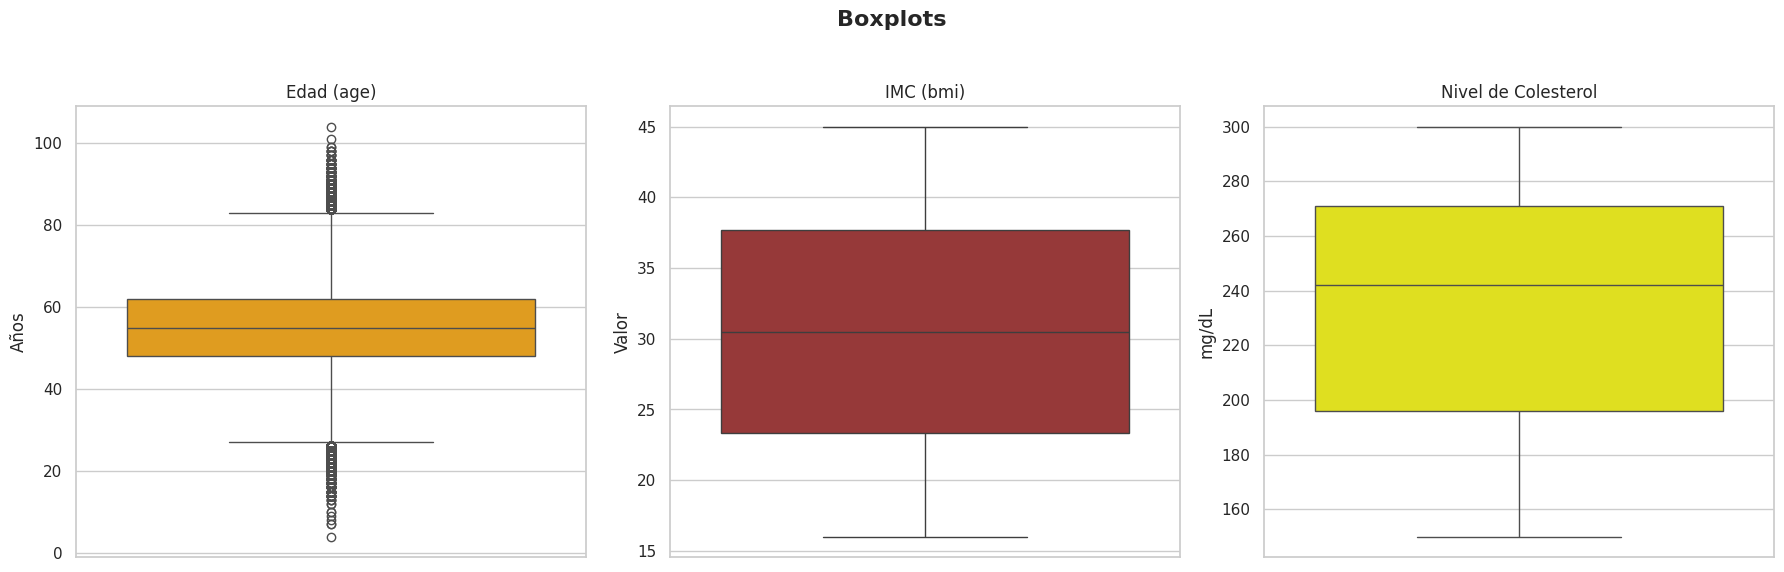

In [4]:
# Solucion
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Boxplots', fontsize=16, fontweight='bold')

# 1. Boxplot para 'age'
sns.boxplot(y=df['age'], ax=axes[0], color='orange')
axes[0].set_title('Edad (age)')
axes[0].set_ylabel('Años')

# 2. Boxplot para 'bmi'
sns.boxplot(y=df['bmi'], ax=axes[1], color='brown')
axes[1].set_title('IMC (bmi)')
axes[1].set_ylabel('Valor')

# 3. Boxplot para 'cholesterol_level'
sns.boxplot(y=df['cholesterol_level'], ax=axes[2], color='yellow')
axes[2].set_title('Nivel de Colesterol')
axes[2].set_ylabel('mg/dL')

# Ajustar el espacio entre los gráficos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()